In [1]:
from IPython.display import display, HTML, Javascript

def f():
    return HTML("""
    <style>
        @font-face {
            /* تعریف نام فونت */
            font-family: 'BZar';
            /* اکسپلورر 9 به بعد */
            src: url('font/BZar.eot');
            /* بررسی نصب بودن فونت در سیستم کاربر */
            src: local('bZar'),
                 /* برای برخی از مرورگرها مانند سافاری */
                 local('b Zar'),
                 /* هک برای اکسپلورر 8 و ماقبل */
                 url('font/BZar.eot?#iefix') format('embedded-opentype'),
                 /* فرمت مناسب مرورگرهای خیلی جدید */
                 url('font/BZar.woff2') format('woff2'),
                 /* فرمت مناسب مرورگرهای تقریبا جدید */
                 url('font/BZar.woff') format('woff'),
                 /* تمام مرورگرها به جزء اکسپلورر */
                 url('font/BZar.ttf') format('truetype'),
                 /* نسخه‌های قدیمی سیستم عامل iOS */
                 url('font/BZar.svg#BZar') format('svg');
            font-style: normal;
            font-weight: normal;
            font-display: swap;
        }
    
    
        .reveal .slides {
            direction: rtl;
            text-align: right;
        }
        
        div {
            direction: ltr;
            text-align: left;
        }
        
        p > img {
          display: block;
          margin-left: auto;
          margin-right: auto;
          max-width:75%; 
          height:auto;
        }
        
        div.text_cell_render.rendered_html > *, li > p, .rendered_html p, #quarto-document-content > *
        {
            direction: rtl;
            text-align: right;
            font-family: BZar, Tahoma, Geneva, sans-serif;
            font-size: x-large;
            line-height: 26pt;
            color: black;
        }
        
        .jp-CodeMirrorEditor .jp-Editor .jp-InputArea-editor {
            direction: rtl !important;
        }
        
        .CodeMirror-lines .output_subarea .output_text .output_stream .output_stdout{
            direction: ltr !important;
        }
    </style>
    """)

f()

In [2]:
from IPython.display import display, HTML, Javascript

def g():
    return HTML("""
    <link rel="stylesheet" href="css/jquery.jqZoom.css" />
    <script src="js/jquery-1.12.4.min.js"></script>
    <script src="js/jquery.zoom.min.js"></script>
    <script>
        $(document).ready(function(){
            $("img").children().off();
            $('img')
            .wrap('<span style="display:inline-block"></span>')
            .css('display', 'block')
            .parent()
            .zoom({ on:'grab', duration: 150, magnify: 1 });
        });
    </script>
    """)

g()

### این فصل موارد زیر را پوشش می‌دهد:

* درک مصالحه بین تعمیم و بهینه‌سازی که مسئله اساسی در یادگیری ماشین است. 
* روش‌های ارزیابی برای مدل‌های یادگیری ماشین
* بهترین شیوه‌ها برای بهبود برازش مدل
* بهترین شیوه‌ها برای دستیابی به تعمیم بهتر و مقابله با بیش‌برازش به عنوان مشکل اصلی در یادگیری ماشین

## تعمیم: هدف یادگیری ماشینی

- در سه مثال ارائه شده در فصل 4 یعنی پیش‌بینی بررسی فیلم، طبقه‌بندی موضوع، و رگرسیون قیمت مسکن - داده‌ها را به یک مجموعه آموزشی، یک مجموعه اعتبارسنجی و یک مجموعه آزمایشی تقسیم کردیم.
- دلیل ارزیابی نکردن مدل‌ها بر اساس داده‌های آموزشی همان مشکل بیش‌برازش `overfitting` بود یعنی پس از چند دوره، عملکرد مدل بر روی داده‌های اعتبارسنجی که قبلاً دیده نشده بود، از عملکرد روی داده‌های آموزشی بسیار بدتر می‌شد در حالی که با دقت آموزش بهبود می‌یافت.
    - مدل‌ها شروع به بیش‌برازش کردند.
    - بیش‌برازش در هر مشکل یادگیری ماشینی اتفاق می‌افتد.

- مسئله اساسی در یادگیری ماشین مصالحه بین بهینه‌سازی (optimization) و تعمیم (generalization) است.
    - _بهینه‌سازی_ به فرآیند تنظیم یک مدل برای دستیابی به بهترین عملکرد ممکن در داده‌های آموزشی اشاره دارد (_یادگیری_ در _یادگیری ماشینی_)، 
    _تعمیم_به عملکرد مدل آموزش دیده بر روی داده‌هایی اشاره دارد که قبلاً هرگز ندیده است.
- در حالی که داده‌های اعتبارسنجی قبلا دیده نشده‌اند چطور می‌توانیم دقت مدل را روی آنها افزایش دهیم؟
    - جواب: تعمیم

- اگر بیش از حد روی بهینه‌سازی کار کنیم دچار بیش‌برازش می‌شویم و تعمیم آسیب می‌بیند.

### Underfitting and overfitting

- الگوی شکل زیر در روش های ML عمومیت دارد و آن را با هر نوع مدل و هر مجموعه داده‌ای خواهید دید.

![Canonical overfitting behavior](img/05-01.png)

در ابتدای آموزش، بهینه‌سازی و تعمیم همبستگی دارند: هرچه تلفات داده‌های آموزشی کمتر باشد، خطای داده‌های آزمون هم کمتر می‌شود.
- در حالی که این اتفاق می‌افتد، گفته می‌شود مدل شما _underfit_ است: 

- هنوز جای پیشرفت وجود دارد. 

- شبکه هنوز تمام الگوهای مرتبط در داده‌های آموزشی را مدل‌سازی نکرده است.
- اما پس از تعداد معینی تکرار در داده‌های آموزشی، تعمیم‌ بهبود نمی‌یابد، بهبود معیارهای اعتبارسنجی متوقف می‌شوند و سپس شروع به تنزل می‌کنند: 
- مدل شروع به بیش‌برازش برازش می‌کند.
- یعنی شروع به یادگیری الگوهایی می‌کند که مختص داده‌های آموزشی هستند، 
- اما وقتی داده‌های جدید از راه می‌رسند، مدل گمراه می‌شود.

احتمال رخداد بیش‌برازش در موارد زیر بیشتر هست:
- داده‌ها نویزی باشد، 
- شامل عدم قطعیت باشد، 
- شامل ویژگی‌های کمیاب باشد.

## Noisy training data

در مجموعه داده‌های دنیای واقعی، نامعتبر بودن برخی ورودی‌ها نسبتاً رایج است.
- برای مثال، شاید یک رقم MNIST می‌تواند یک تصویر تمام سیاه یا چیزی شبیه شکل زیر باشد.

![Some pretty weird MNIST training samples](img/05-02.png)

این‌ها چه ارقامی هستند؟! 

- اما همه آنها بخشی از مجموعه آموزشی MNIST هستند.

- اتفاق بد زمانی رخ می‌دهد که این داده‌ها به اشتباه برچسب‌گذاری می‌شوند.

![Mislabeled MNIST training samples](img/05-03.png)

اگر مجموعه داده دارای چنین داده‌های پرتی باشد، عملکرد تعمیم آن کاهش می‌یابد، 
     
- به عنوان مثال، 4 که به نظر می‌رسد بسیار نزدیک به 4 in برچسب اشتباه است
  
![may end up getting classified as a 9.](img/05-03.png)

![Dealing with outliers: robust fit vs. overfitting](img/05-04.png)

## ویژگی‌های مبهم
- گاهی داده‌ها شامل عدم قطعیت و ابهام هستند:
    - آیا کیفیت میوه مناسب هست؟
    - آیا هوا خوب هست؟
- یک مدل خوب باید در کنار پیش‌بینی به داده‌ها در به مناطق مبهم فضای ویژگی، مانند شکل 5.5، احتمال (قطعیت) اضافه کند.

![Robust fit vs. overfitting giving an ambiguous area of the feature space](img/05-05.png)

## ویژگی‌های نادر و همبستگی‌های جعلی

- اگر برخی نمونه‌ها یا مقادیر ویژگی‌ها کم باشند ممکن است استنتاج نادرستی در مدل صورت بگیرد. 
- مدل‌های یادگیری ماشینی آموزش‌دیده بر روی مجموعه داده‌هایی که شامل مقادیر ویژگی‌های کمیاب هستند، بسیار مستعد برازش بیش‌برازش هستند.
- در یک کار طبقه‌بندی احساسات (`sentiment analysis`)، اگر یک کلمه کمیاب فقط در یک متن در داده‌های آموزشی ظاهر شود، و این متن از نظر احساسات منفی باشد، یک مدل ضعیف ممکن است وجود این کلمه را متناسب با طبقه منفی طبقه‌بندی کند، در حالی که در واقع چنین چیزی نیست!

- وجود داده‌های نویزی از داده‌های با مقدار ثابت و بی‌معنا هم بیشتر هست، زیرا ممکن هست یک همبستگی نادرست با برچسب‌ها توسط مدل استنتاج شود. 
- این یکی از رایج ترین منابع بیش برازش است.

### مثال: 
مجموعه داده MNIST را در نظر بگیرید. به دو روش زیر هر بار اندازه مجموعه داده را دو برابر کنید.
    - با الحاق 784 بعد نویز سفید به 784 بعد موجود داده 
    - با الحاق 784 بعد داده تمام صفر به 784 بعد موجود داده 
- این الحاق ویژگی‌های بی معنی بر محتوای اطلاعاتی داده‌ها تأثیر نمی‌گذارد:
    - دقت طبقه‌بندی انسان به هیچ وجه تحت تأثیر این دگرگونی‌ها قرار نمی‌گیرد.

**افزودن کانال‌های نویز سفید یا کانال‌های تمام صفر به MNIST**

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**آموزش همان مدل بر روی داده‌های MNIST با کانال‌های نویز یا کانال‌های صفر***

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2023-05-06 15:07:12.077442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 15:07:12.079098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib64/::/lib/:/envs/both/lib/
2023-05-06 15:07:12.079689: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib64/::/lib/:/envs/both/lib/
2023-05-06 15:07:12.080209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No

Epoch 1/10
375/375 [==============================] - 12s 31ms/step - loss: 0.6187 - accuracy: 0.8141 - val_loss: 0.3314 - val_accuracy: 0.8978
Epoch 2/10
375/375 [==============================] - 11s 29ms/step - loss: 0.2524 - accuracy: 0.9222 - val_loss: 0.2761 - val_accuracy: 0.9108
Epoch 3/10
375/375 [==============================] - 11s 29ms/step - loss: 0.1636 - accuracy: 0.9495 - val_loss: 0.1645 - val_accuracy: 0.9512
Epoch 4/10
375/375 [==============================] - 11s 28ms/step - loss: 0.1175 - accuracy: 0.9636 - val_loss: 0.1535 - val_accuracy: 0.9527
Epoch 5/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0851 - accuracy: 0.9734 - val_loss: 0.1316 - val_accuracy: 0.9613
Epoch 6/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0643 - accuracy: 0.9794 - val_loss: 0.1313 - val_accuracy: 0.9617
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.1127 - val_accuracy:

**ترسیم مقایسه دقت اعتبارسنجی**

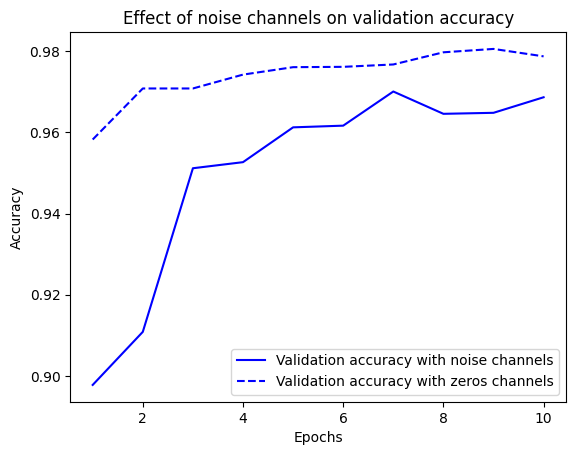

In [6]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

علی‌رغم وجود داده‌هایی که در هر دو مورد اطلاعات یکسانی دارند، صرفاً به واسطه‌ی تأثیر همبستگی‌های جعلی، دقت اعتبار مدل آموزش‌دیده شده با وجود کانال‌های نویز تقریباً یک درصد کمتر می‌شود (شکل 5.6 را ببینید) - 
    - به طور کلی هرچه کانال‌های نویز بیشتری اضافه کنید، دقت بیشتر کاهش می‌یابد.

![Effect of noise channels on validation accuracy](img/05-06.png)

- ویژگی‌های نویزی به طور اجتناب‌ناپذیری منجر به بیش‌برازش می‌شود.
- به این ترتیب، در مواردی که مطمئن نیستید ویژگی‌هایی که دارید شامل اطلاعات مفیدی هستند یا پرت هستند، معمولاً قبل از آموزش _انتخاب ویژگی_ را انجام دهید.
- به عنوان مثال، محدود کردن داده‌های IMDB به 10000 کلمه متداول برتر، شکل اولیه‌ای از انتخاب ویژگی بود.
- روش معمولی برای انجام انتخاب ویژگی این است که برای هر ویژگی موجود مقداری امتیاز سودمندی را محاسبه کنید 
    - معیار میزان آموزنده بودن ویژگی با توجه به کاربرد تعیین می‌شود:
        - حفظ ویژگی‌هایی که (واریانس آنها) از یک مقدار آستانه بیشتر هست.
        - بر اساس ارتباط اطلاعاتی متقابل بین ویژگی و برچسب‌ها 
    - انجام این کار کانال‌های نویز سفید را در مثال قبل فیلتر می‌کند.

### ماهیت تعمیم در یادگیری عمیق

در مورد مدل‌های یادگیری عمیق می‌توان آن‌ها را برای تناسب با هر چیزی (!) آنقدر آموزش داد، تا زمانی که قدرت بازنمایی (`representational power`) کافی داشته باشند!
     - سعی کنید برچسب‌های MNIST را به هم بزنید و یک مدل در آن آموزش دهید. خطا کاهش می‌يابد!
     - اما خطای اعتبارسنجی شاهد هیچ بهبودی نخواهد بود.

** تطبیق یک مدل MNIST با برچسب‌های به هم ریخته تصادفی **

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 7s 17ms/step - loss: 2.3170 - accuracy: 0.1049 - val_loss: 2.3097 - val_accuracy: 0.1009
Epoch 2/100
375/375 [==============================] - 6s 17ms/step - loss: 2.2999 - accuracy: 0.1171 - val_loss: 2.3178 - val_accuracy: 0.1023
Epoch 3/100
375/375 [==============================] - 6s 17ms/step - loss: 2.2897 - accuracy: 0.1287 - val_loss: 2.3226 - val_accuracy: 0.0999
Epoch 4/100
375/375 [==============================] - 6s 17ms/step - loss: 2.2760 - accuracy: 0.1406 - val_loss: 2.3283 - val_accuracy: 0.1019
Epoch 5/100
375/375 [==============================] - 7s 17ms/step - loss: 2.2581 - accuracy: 0.1571 - val_loss: 2.3421 - val_accuracy: 0.1010
Epoch 6/100
375/375 [==============================] - 6s 17ms/step - loss: 2.2384 - accuracy: 0.1690 - val_loss: 2.3567 - val_accuracy: 0.1020
Epoch 7/100
375/375 [==============================] - 6s 17ms/step - loss: 2.2120 - accuracy: 0.1840 - val_loss: 2.3759 - val_accuracy:

در واقع، شما حتی نیازی به انجام این کار با داده‌های MNIST ندارید - فقط می‌توانید ورودی‌های نویز سفید و برچسب‌های تصادفی ایجاد کنید.
- تا زمانی که پارامترهای کافی داشته باشد، می‌توانید مدلی را نیز روی آن قرار دهید.
- در نهایت فقط ورودی‌های خاصی را حفظ می‌کند، دقیقاً مانند فرهنگ لغت پایتون.

- اگر اینطور است، 

    - پس چگونه مدل‌های یادگیری عمیق اصلاً تعمیم می‌یابند؟ 

    - اگر آنها نهایتا یک تصویر از ورودی به خروجی یاد می‌گیرند، چطور با داده‌های جدید که تا به حال ندیده‌اند برخورد می‌کنند؟ 
همانطور که مشخص است، ماهیت تعمیم در یادگیری عمیق نسبتاً ارتباط کمی با خود مدل‌های یادگیری عمیق دارد و ارتباط زیادی با ساختار اطلاعات در دنیای واقعی دارد.

#### فرضیه منیفلد

مسئله دسته‌بندی در مجموعه داده‌ی MNIST را در نظر بگیرید.
ورودی طبقه‌بندی‌کننده MNIST (قبل از پیش‌پردازش) یک آرایه ۲۸×۲۸ از اعداد صحیح بین ۰ تا ۲۵۵ است.
- بنابراین تعداد کل مقادیر ورودی ممکن 256 به توان 784 است که بسیار بیشتر از تعداد اتم‌های جهان است!
- با این حال، تعداد بسیار کمی از این ورودی‌ها مانند نمونه‌های معتبر MNIST به نظر می‌رسند: 

    - ارقام دست‌نویس واقعی فقط یک فضای فرعی کوچک از فضای والد همه آرایه‌های ممکن 28 × 28 با نوع داده‌ی uint8 را اشغال می‌کنند.

    - علاوه بر این، این زیرفضا فقط مجموعه‌ای از نقاط نیست که به‌طور تصادفی در فضای والد قرار داشته باشند: آنها بسیار ساختارمند هستند.
    - continuous: اگر نمونه‌ای را بردارید و کمی آن را اصلاح کنید، همچنان به عنوان همان رقم دست‌نویس قابل تشخیص است.
    - connected: 

    - علاوه بر این، تمام نمونه‌های موجود در زیرفضای معتبر توسط مسیرهای همواری که از طریق زیرفضا می‌گذرد، به هم متصل می‌شوند.

    - این بدان معنی است که اگر دو رقم تصادفی MNIST A و B را انتخاب کنید، دنباله‌ای از تصاویر "واسطه" وجود دارد که A را به B تبدیل می‌کنند، به طوری که دو رقم متوالی بسیار نزدیک به یکدیگر هستند (شکل 5.7 را ببینید).

    - شاید چند شکل مبهم نزدیک به مرز بین دو کلاس وجود داشته باشد، اما حتی این اشکال همچنان بسیار شبیه به رقم هستند.

![Different MNIST digits gradually morphing into one another, showing that the space of handwritten digits forms a “manifold.” This image was generated using code from chapter 12.](img/05-07.png)

از نظر فنی، می‌توانید بگویید که ارقام دست‌نویس یک _مانیفولد_ را در فضای آرایه‌های ممکن 28 × 28 با نوع داده‌ی uint8 تشکیل می‌دهند.
- تعریف: «منیفولد» یک زیرفضای با ابعاد پایین‌تر از یک فضای والد است که به صورت محلی شبیه به یک فضای خطی (اقلیدسی) است.

    - به عنوان مثال، یک منحنی صاف در صفحه یک منیفولد 1 بعدی در یک فضای دو بعدی است، زیرا برای هر نقطه از منحنی، می‌توانید یک مماس رسم کنید (منحنی را می‌توان با یک خط در هر نقطه تقریب زد).

    - یک سطح صاف در یک فضای سه بعدی یک منیفولد دو بعدی است.

به طور کلی، فرضیه _منیفولد_ فرض می‌کند که همه داده‌های طبیعی روی یک منیفولد کم‌بعد در فضای با ابعاد بالا که در آن کدگذاری می‌شوند، قرار دارند.
- این یک جمله بسیار قوی در مورد ساختار اطلاعات در جهان است.
- تا آنجایی که ما می‌دانیم، صحیح و دقیق است، و به همین دلیل است که یادگیری عمیق کار می‌کند.
- این برای ارقام MNIST، بلکه برای چهره انسان، مورفولوژی درخت، صداهای صدای انسان و حتی زبان طبیعی نیز صادق است.

فرضیه منیفلد دلالت بر آن دارد

* مدل‌های یادگیری ماشینی فقط باید فضاهای فرعی نسبتاً ساده، کم‌بعد و بسیار ساخت‌یافته را در فضای ورودی بالقوه خود (منیفولدهای پنهان `latent manifolds`) قرار دهند.
* در یکی از این منیفولدها، همیشه می‌توان بین دو ورودی _interpolate کرد، یعنی از طریق یک مسیر پیوسته که در طول آن همه نقاط روی منیفولد قرار می‌گیرند، یکی به دیگری تغییر شکل داد.

توانایی درونیابی بین نمونه‌ها کلید درک مفهوم تعمیم در یادگیری عمیق است.

#### درون‌یابی به عنوان منبع تعمیم

اگر با نقاط داده‌ای کار می‌کنید که می‌توانند درون یابی شوند، می‌توانید نقاطی را که قبلاً هرگز ندیده‌اید، با ربط دادن آن‌ها به نقاط دیگری که در نزدیکی منیفولد قرار دارند، درک کنید.
- به عبارت دیگر، شما می‌توانید با استفاده از یک _نمونه از فضا به کل بودن فضا پی ببرید.
- برای پر کردن جاهای خالی (تشخیص نمونه‌های نادیده) می‌توانید از درون‌یابی استفاده کنید.

توجه داشته باشید که درون یابی در منیفولد نهان با درون یابی خطی در فضای مادر متفاوت است، همانطور که در شکل 5.8 نشان داده شده است.
- به عنوان مثال، میانگین پیکسل بین دو رقم MNIST معمولا یک رقم معتبر نیست.

![Difference between linear interpolation and interpolation on the latent manifold. ](img/05-08.png)
- Every point on the latent manifold of digits is a valid digit, but the average of two digits usually isn’t.

بسیار مهم است، در حالی که یادگیری عمیق از طریق درون یابی بر روی یک تقریب آموخته شده از منیفولد داده به تعمیم دست می‌یابد، این اشتباه است که فرض کنیم درونیابی همه چیز برای تعمیم است.

    - تذکر: درون یابی فقط می‌تواند به شما کمک کند چیزهایی را که بسیار نزدیک به آنچه قبلا دیده‌اید درک کنید: تعمیم محلی را فعال می‌کند.

#### چرا یادگیری عمیق کار می‌کند؟

استعاره توپ کاغذی مچاله شده از فصل 2 را به خاطر دارید؟
- یک ورق کاغذ یک منیفولد دو بعدی را در فضای سه بعدی نشان می‌دهد (شکل 5.9 را ببینید).
- مدل یادگیری عمیق ابزاری برای باز کردن توپ‌های کاغذی است، یعنی برای باز کردن منیفولدهای نهفته.

![Uncrumpling a complicated manifold of data](img/05-09.png)

یک مدل یادگیری عمیق اساساً یک منحنی با ابعاد بسیار بالا است 

    - منحنی صاف و پیوسته 

    - مطابق با محدودیت‌های اضافی در ساختار مدل که از معماری شبکه نشات می‌گیرد.
- شبکه آن منحنی از طریق گرادیان نزولی، به صورت هموار و تدریجی به نقاط داده برازش می‌دهد.
- به عبارت دیگر، یادگیری عمیق یک منحنی بزرگ و پیچیده - یک منیفولد – را می‌گیرد و به تدریج پارامترهای آن را تنظیم می‌کند تا بر داده‌های آموزشی مطابقت یابد.

این منحنی شامل پارامترهای کافی است که می‌تواند با هر چیزی مطابقت داشته باشد 

    - در واقع، اگر به مدل خود اجازه دهید به اندازه کافی تمرین کند، در نهایت داده‌های آموزشی خود را صرفاً حفظ می‌کند و به هیچ وجه تعمیم نمی‌یابد.
- فرضیه منیفلد: داده‌های مورد نظر برای مدل‌سازی یک منیفولد بسیار ساختار یافته و کم بعد در فضای ورودی هستند.
- از آنجایی که مطابقت منحنی مدل شما با داده‌های آموزشی به تدریج و به آرامی در طول زمان و با پیشرفت روش گرایان نزولی اتفاق می‌افتد، یک نقطه میانی در طول آموزش وجود خواهد داشت که در آن مدل تقریباً منیفولد طبیعی داده‌ها را تقریب می‌کند.
    - - به این ترتیب، مدل قادر خواهد بود ورودی‌های دیده نشده را از طریق درون یابی بین ورودی‌های آموزشی درک کند.

    - این موضوع در شکل 5.10 مشاهده می‌کنید.

![Going from a random model to an overfit model, and achieving a robust fit as an intermediate state](img/05-10.png)

در کنار توانایی بالای مدل‌های یادگیری عمیق برای یادگیری، چند نکته باید مورد توجه باشد:

    * مدل‌های یادگیری عمیق نقشه‌برداری هموار و پیوسته را از ورودی‌ها به خروجی‌هایشان پیاده‌سازی می‌کنند.

    - بنابراین منیفلدها باید صاف و پیوسته باشد زیرا بنا به ضرورت باید مشتق‌پذیر باشند (در غیر این صورت نمی‌توانستید نزول گرادیان را انجام دهید).

    * معماری شبکه باید با «شکل» اطلاعات در داده‌های آموزشی مطابقت داشته باشد و بازتاب داده‌ها باشند.

    - این مورد به ویژه در مورد مدل‌های پردازش تصویر (مورد بحث در فصل‌های 8 و 9) و مدل‌های پردازش توالی (فصل 10) صادق است.

#### داده‌های آموزشی بسیار مهم است

گرچه یادگیری عمیق برای یادگیری منیفلد مناسب است، قدرت تعمیم بیشتر نتیجه ساختار طبیعی داده‌های شما است:
    - فقط در صورتی می‌توانید تعمیم دهید که داده‌های شما منیفولدی باشد که نقاط را بتوان درون‌یابی کرد.
    - هرچه ویژگی‌های شما آموزنده‌تر و نویز کمتری داشته باشد، بهتر می‌توانید تعمیم دهید، زیرا فضای ورودی شما ساده‌تر و ساختار بهتری خواهد داشت.
    - تنظیم داده‌ها و مهندسی ویژگی برای تعمیم ضروری است.
    - داده‌ها باید نمونه‌برداری متراکم از فضای ورودی باشند، مخصوصا در نزدیکی مرزهای تصمیم‌گیری.
        - شکل 5.11 را ببینید.
    - با یک نمونه برداری به اندازه کافی متراکم، می‌توان ورودی‌های جدید را با درون‌یابی بین ورودی‌های آموزشی گذشته درک کرد.
        - در اینجا نیازی به استفاده از عقل، استدلال انتزاعی یا دانش خارجی در مورد جهان وجود ندارد!

![A dense sampling of the input space is necessary in order to learn a model capable of accurate generalization.](img/05-11.png)

- بهترین راه برای بهبود یک مدل یادگیری عمیق، آموزش آن بر روی داده‌های بیشتر یا داده‌های بهتر است 

    - البته، اضافه کردن داده‌های نویزی یا نادرست به تعمیم آسیب می‌رساند.

    - پوشش متراکم تری از منیفولد داده ورودی، مدلی را به دست می‌دهد که تعمیم بهتری دارد.

    - هرگز نباید انتظار داشته باشید که یک مدل یادگیری عمیق چیزی بیش از درون یابی خام بین نمونه‌های آموزشی خود انجام دهد و بنابراین باید هر کاری که می‌توانید انجام دهید تا درون یابی را تا حد امکان آسان کنید.
- تنها چیزی که در یک مدل یادگیری عمیق می‌یابید، چیزی است که در آن قرار می‌دهید: 
     1.  دانش پیشین که در طراحی معماری شبکه جاسازی شده است.
     2. داده‌های آموزشی.

- اگر افزایش تعداد و کیفیت داده‌ها برای مقابله با بیش‌برازش میسر نباشد، بهترین راه حل بعدی تعدیل مقدار اطلاعاتی است که مدل شما مجاز به ذخیره آن است (اضافه کردن محدودیت‌هایی برای صاف بودن منحنی مدل)
- اگر شبکه‌ای فقط توانایی حفظ تعداد کمی از الگوها یا الگوهای بسیار منظم را داشته باشد، فرآیند بهینه‌سازی آن را وادار می‌کند تا بر برجسته ترین الگوها تمرکز کند که شانس بیشتری برای تعمیم خوب دارند.
- فرآیند مبارزه با بیش‌برازش متناسب از این طریق _`regularization` _ نامیده می‌شود.
    - در مورد آن بعدا صحبت می‌کنیم.

## ارزیابی مدل‌های یادگیری ماشینی
شما فقط می‌توانید آنچه را که می‌توانید مشاهده کنید، کنترل کنید.
    - چطور می‌توانیم توانایی تعمیم را اندازه‌گیری کنیم؟

### مجموعه‌های آموزشی، اعتبارسنجی و تست

ارزیابی یک مدل همیشه به تقسیم داده‌های موجود به سه مجموعه خلاصه می‌شود: آموزش، اعتبار سنجی و آزمایش.
- شما بر روی داده‌های آموزشی آموزش می‌بینید و مدل خود را بر روی داده‌های اعتبارسنجی ارزیابی می‌کنید.
- هنگامی که مدل شما آماده شد، آن را برای آخرین بار روی داده‌های آزمایشی آزمایش می‌کنید

     داده‌های آزمایش تا حد امکان شبیه به داده‌های دنیای واقعی هستند.
- سپس می‌توانید مدل را مستقر کنید (deployment).

چرا فقط دو مجموعه نداشته باشیم: یک مجموعه آموزشی و یک مجموعه تست؟

    - شما روی داده‌های آموزشی آموزش می‌بینید و روی داده‌های آزمون ارزیابی می‌کنید.

    - خیلی ساده‌تر هست! ولی...

دلیل آن این است که توسعه یک مدل همیشه مستلزم تنظیم پیکربندی (configuration) آن است که در آن _hyperparameters` تعیین می‌شوند: 
- انتخاب تعداد لایه‌ها
- اندازه لایه‌ها 
- این تنظیم را با استفاده از سیگنال بازخورد از عملکرد مدل روی داده‌های اعتبارسنجی انجام می‌دهید.

- خطر: تنظیم پیکربندی مدل بر اساس عملکرد آن در مجموعه اعتبارسنجی می‌تواند به سرعت منجر به *بیش‌برازش* با مجموعه اعتبارسنجی شود، 

    - حتی اگر مدل شما هرگز مستقیماً روی آن آموزش داده نشود.

    - مفهوم نشت اطلاعات 

    - هر بار که یک ابرپارامتر از مدل خود را بر اساس عملکرد مدل در مجموعه اعتبارسنجی تنظیم می‌کنید، اطلاعاتی در مورد داده‌های اعتبارسنجی به مدل نشت می‌کند.

    - با تکرار این فرآیند روی داده‌های اعتبارسنجی دچار بیش‌برازش می‌شوید!

    - مقدار قابل توجهی از اطلاعات مربوط به مجموعه اعتبار‌سنجی به مدل درز خواهد کرد.
- شما به عملکرد روی داده‌های کاملاً جدید اهمیت می‌دهید، نه به داده‌های اعتبارسنجی، بنابراین باید از یک مجموعه داده کاملاً متفاوت و هرگز دیده نشده برای ارزیابی مدل استفاده کنید: مجموعه داده آزمایشی.
- مدل شما نباید به _هیچ_ اطلاعاتی درباره مجموعه تست دسترسی داشته باشد، حتی به صورت غیرمستقیم وگرنه معیار تعمیم شما ناقص خواهد بود.

### روش های تقسیم داده‌ها به مجموعه‌های آموزشی، اعتبار سنجی و آزمایش: 
    - `holdout` ساده،
    - اعتبار‌سنجی `K-fold`،
    - اعتبارسنجی `K-fold` تکرار شونده همراه با درهم‌ریختن.

#### اعتبار سنجی  `holdout` ساده
بخشی از داده‌های خود را به عنوان مجموعه آزمایشی جدا کنید.
- بر روی داده‌های باقی مانده آموزش دهید و روی مجموعه تست ارزیابی کنید.
- همانطور که در قسمت‌های قبلی دیدید، برای جلوگیری از درز اطلاعات، نباید مدل خود را بر اساس مجموعه تست تنظیم کنید و بنابراین باید یک مجموعه اعتبار سنجی رزرو کنید.

![Simple holdout validation split](img/05-12.png)

-مزایا و معایب
     - ساده است.
     - اگر داده‌های کمی در دسترس باشد، اعتبارسنجی و مجموعه‌های آزمایشی شما ممکن است حاوی نمونه‌های بسیار کمی باشد که از نظر آماری معرف داده‌های موجود نباشد.
     - روش تشخیص: اگر قبل تقسیم داده‌ها را به صورت تصادفی بر بزنیم و این کار را چند بار تکرار کنیم، به معیارهای بسیار متفاوتی از عملکرد مدل منجر ‌می‌شود.
     

#### اعتبار K-fold
با این روش، داده‌های خود را به پارتیشن‌های K با اندازه مساوی تقسیم می‌کنید.

    - برای هر پارتیشن i، یک مدل را روی پارتیشن‌های K - 1 باقی مانده آموزش دهید و آن را در پارتیشن i ارزیابی کنید.

    - نمره نهایی شما پس از آن میانگین نمرات K به دست آمده است.

    - این روش زمانی مفید است که عملکرد مدل شما واریانس قابل توجهی را بر اساس تقسیم آموزش-آزمون نشان دهد.

![K-fold cross-validation with K=3](img/05-13.png)

#### اعتبار‌سنجی K-fold تکرار شونده با درهم‌زدن
این یکی برای موقعیت‌هایی است که در آن داده‌های نسبتا کمی در دسترس دارید و باید مدل خود را تا حد امکان دقیق ارزیابی کنید.

    - مناسب برای مسابقات کگل

    - شامل استفاده از اعتبار سنجی K-fold چندین بار، به هم زدن داده‌ها هر بار قبل از تقسیم آن به K راه است.

    - امتیاز نهایی میانگین نمرات به دست آمده در هر مرحله از اعتبارسنجی K-fold است.

    - توجه داشته باشید که در نهایت مدل‌ها $P*K$ را آموزش و ارزیابی ‌کنید ($P$ تعداد تکرارهاست)، 

    - پیاده‌سازی بسیار پرهزینه است!

### عبور از خط پایه  (`baseline`)
علاوه بر پروتکل‌های ارزیابی متفاوتی که در دسترس دارید، آخرین چیزی که باید در مورد آن بدانید استفاده از خطوط پایه است.

- اگر بگویند دقت مدل 15% روی مجموعه داده‌های اعتبارسنجی است، خوب هست؟

    - قبل از شروع کار با مجموعه داده، همیشه باید یک خط پایه را انتخاب کنید که سعی کنید آن را شکست دهید.

    - اگر از این آستانه عبور کنید، می‌دانید که کاری را درست انجام می‌دهید.

    - این خط پایه می‌تواند عملکرد یک طبقه‌بندی تصادفی یا عملکرد ساده‌ترین تکنیک غیر از یادگیری ماشین باشد.

    - مثال: در مثال طبقه‌بندی رقمی MNIST، یک خط پایه ساده، دقت اعتبارسنجی بیشتر از 0.1 (طبقه‌بندی‌کننده تصادفی) است. 

    - در مثال IMDB، دقت اعتبارسنجی بیشتر از 0.5 خواهد بود.

    - در مثال رویترز، به دلیل عدم تعادل طبقاتی، حدود 0.18-0.19 خواهد بود.

    - اگر مسئله طبقه‌بندی باینری دارید که در آن 90% نمونه‌ها متعلق به کلاس A و 10% متعلق به کلاس B هستند، طبقه‌بندی‌کننده‌ای که همیشه A را پیش‌بینی می‌کند از قبل به 0.9 در دقت اعتبار می‌رسد!

    - داشتن خط مبنای زمانی ضروری است که در حال شروع حل مسئله‌ای برای اولین بار هستید.

    - اگر نمی‌توانید راه‌حل‌های بی‌اهمیت را شکست دهید، مدل شما بی‌ارزش است! 

### چیزهایی که باید در مورد ارزیابی مدل در نظر داشت

هنگام انتخاب پروتکل ارزیابی به موارد زیر توجه داشته باشید:

* _نمایندگی داده ها_—شما می‌خواهید هم مجموعه آموزشی و هم مجموعه تست شما معرف داده‌های موجود باشد.

    - به عنوان مثال، اگر می‌خواهید تصاویر ارقام را طبقه‌بندی کنید، و از آرایه‌ای از نمونه‌ها شروع می‌کنید که نمونه‌ها بر اساس کلاس آنها مرتب شده‌اند، 80% اول آرایه را به عنوان مجموعه آموزشی خود در نظر می‌گیرید و بقیه را در نظر بگیرید. 20\% به عنوان مجموعه تست شما باعث می‌شود مجموعه آموزشی شما فقط شامل کلاس‌های 0-7 باشد، در حالی که مجموعه تست شما فقط شامل کلاس‌های 8-9 خواهد بود.

    - به همین دلیل، معمولاً باید داده‌های خود را قبل از تقسیم به مجموعه‌های آموزشی و آزمایشی، به صورت تصادفی به هم بزنید.
* _در نظر گرفتن زمان_—اگر می‌خواهید آینده را با توجه به گذشته پیش‌بینی کنید (مثلاً آب‌وهوای فردا، حرکت سهام و غیره)، نباید قبل از تقسیم داده‌هایتان به‌طور تصادفی آن‌ها را به هم بزنید، وگرنه نشت اطلاعاتی از آینده به گذشته رخ می‌دهد. 

    - در چنین شرایطی، همیشه باید مطمئن شوید که تمام داده‌های مجموعه آزمایشی بعد (`posterior`) مجموعه داده‌های آموزشی هستند.
* _افزونگی در داده‌ها_—اگر برخی از نقاط داده در داده‌های شما دو بار ظاهر شوند (تقریباً با داده‌های دنیای واقعی رایج است)، سپس به هم زدن داده‌ها و تقسیم آن به یک مجموعه آموزشی و یک مجموعه اعتبار سنجی منجر به افزونگی بین مجموعه‌های آموزشی و اعتبار سنجی می‌شود. 

    - در واقع، بخشی از داده‌های آموزشی خود را آزمایش خواهید کرد، که بدترین کاری است که می‌توانید انجام دهید! 

    - مطمئن شوید که مجموعه آموزشی و مجموعه اعتبار سنجی شما از هم *جدا* هستند.

رویکرد کلی باید به این صورت باشد که اول باید شاهد `overfit` شدن مدل خود باشید و در ادامه به مصالحه بین بهینه‌سازی و تعمیم برسید.

    - از آنجایی که از قبل نمی‌دانید مرز مناسب کجاست، باید از آن عبور کنید تا آن را پیدا کنید!

    - سپس برای بهبود تعمیم وارد عمل شویم.

     
### سه حالت در شروع حل مسئله 
     1. مدل آموزش نمی‌بیند: خطای آموزش شما به مرور زمان کاهش نمی‌یابد.
        - گاهی اوقات آموزش شروع نمی‌شود یا خیلی زود متوقف می‌شود.
     2. آموزش به خوبی شروع می‌شود، اما مدل شما به خوبی تعمیم نمی‌یابد و نمی‌توانید خط پایه را شکست دهید.
     3. خطای آموزش و اعتبارسنجی هر دو به مرور زمان کاهش می‌یابد و از خط پایه عبور می‌کنیم ولی دچار بیش‌برازش نمی‌شویم.

### حل مشکلات در برخورد اولیه در ایجاد مصالحه
- همیشه می‌توان بر این مشکل غلبه کرد.

    - باید پارامترهای گرادیان نزولی را تنظیم کنیم.

    - انتخاب بهینه‌ساز مناسب، 

    - توزیع مقادیر اولیه در وزن‌های مدل، 

    - نرخ یادگیری *

    - اندازه دسته *.
- معمولاً تنظیم نرخ یادگیری و اندازه دسته و در عین حال ثابت نگه داشتن بقیه پارامترها کافی است.

مثال: MNIST 

**آموزش مدل MNIST با نرخ یادگیری نادرست بالا**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 710.2678 - accuracy: 0.3105 - val_loss: 2.5704 - val_accuracy: 0.2838
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 4.7851 - accuracy: 0.2219 - val_loss: 2.5500 - val_accuracy: 0.2272
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 3.4537 - accuracy: 0.2394 - val_loss: 2.4801 - val_accuracy: 0.2782
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6900 - accuracy: 0.2394 - val_loss: 2.1549 - val_accuracy: 0.2315
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6728 - accuracy: 0.2534 - val_loss: 2.1577 - val_accuracy: 0.2768
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6551 - accuracy: 0.2620 - val_loss: 2.5337 - val_accuracy: 0.2966
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.7431 - accuracy: 0.2809 - val_loss: 5.9456 - val_accuracy: 0.2612
Epoc

این مدل به سرعت به دقت آموزشی و اعتبارسنجی در محدوده 30٪ تا 40٪ می‌رسد، اما نمی‌تواند از آن عبور کند.
- بیایید سعی کنیم نرخ یادگیری را به مقدار معقول تر 1e-2 کاهش دهیم.

**همان مدل با نرخ یادگیری مناسب**

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3989 - accuracy: 0.1005 - val_loss: 2.4022 - val_accuracy: 0.0997
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3989 - accuracy: 0.1005 - val_loss: 2.4022 - val_accuracy: 0.0997
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 2.3989 - accuracy: 0.1005 - val_loss: 2.4022 - val_accuracy: 0.0997
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3989 - accuracy: 0.1005 - val_loss: 2.4022 - val_accuracy: 0.0997
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3989 - accuracy: 0.1005 - val_loss: 2.4022 - val_accuracy: 0.0997
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3989 - accuracy: 0.1005 - val_loss: 2.4022 - val_accuracy: 0.0997
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3989 - accuracy: 0.1005 - val_loss: 2.4022 - val_accuracy: 0.0997
Epoch 

این مدل اکنون قادر به آموزش است.

اگر در موقعیت مشابهی قرار گرفتید، سعی کنید

* کاهش یا افزایش نرخ یادگیری.
- نرخ یادگیری بسیار بالا ممکن است منجر به به‌روزرسانی‌هایی شود که از تناسب مناسب فراتر می‌رود، مانند مثال قبل، و نرخ یادگیری بسیار پایین ممکن است آموزش را چنان کند کند که به نظر می‌رسد متوقف می‌شود.
* افزایش اندازه دسته.
- دسته‌ای با نمونه‌های بیشتر منجر به گرادیان‌هایی می‌شود که اطلاعات بیشتری دارند و نویز کمتری دارند (واریانس کمتر).

- برای حل مشکل دوم که سخت‌ترین مشکل هست، راه ساده‌ای وجود ندارد:

    - مدل شما آموزش می‌دهد اما تعمیم نمی‌یابد.

    - این نشان می‌دهد که *چیزی اساساً در رویکرد شما اشتباه است*.

    - ممکن است داده‌های ورودی که استفاده می‌کنید به سادگی حاوی اطلاعات کافی برای پیش‌بینی اهداف شما نباشد:

    - این همان چیزی است که قبلاً هنگامی که ما سعی کردیم مدل MNIST را در جایی که برچسب‌ها به هم می‌پیوندند قرار دهیم، اتفاق افتاد: مدل به خوبی تمرین می‌کرد، اما دقت اعتبارسنجی در 10٪ باقی می‌ماند، زیرا تعمیم با چنین مجموعه داده‌ای آشکارا غیرممکن بود.
        - همچنین ممکن است نوع مدلی که استفاده می‌کنید برای مسئله موجود مناسب نباشد:
            - به عنوان مثال، استفاده از معماری متصل و متراکم (fully connected) برای مسئله سری زمانی. 
            - هر کاربردی معماری مناسبی می‌طلبد.

- برای حل مشکل سوم، یعنی حالتی که موفق شدید به مدلی برسید که توانایی یادگیری دارد و از خط پایه روی داده‌های اعتبارسنجی عبور می‌کند ولی دچار بیش‌برازش نمی‌شود، باید مدل خود را تقویت کنید. 
- به عبارت دیگر مشکل از قدرت بازنمایی مدل شماست: به یک مدل بزرگ‌تر نیاز دارید، مدلی با ظرفیت بیشتر، یعنی مدلی که می‌تواند اطلاعات بیشتری را ذخیره کند.
- افزایش تعداد لایه‌ها یا تعداد واحد‌ها در لایه‌ها یا لایه‌های قدرتمند‌تر

- مثال: مدل کوچک زیر را در نظر بگیرید - یک رگرسیون لجستیک ساده - که بر روی پیکسل‌های MNIST آموزش داده شده است.

**یک رگرسیون لجستیک ساده در MNIST**

In [10]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6679 - accuracy: 0.8334 - val_loss: 0.3572 - val_accuracy: 0.9048
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.9031 - val_loss: 0.3072 - val_accuracy: 0.9141
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.9119 - val_loss: 0.2897 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.9158 - val_loss: 0.2798 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.9192 - val_loss: 0.2742 - val_accuracy: 0.9238
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.9208 - val_loss: 0.2731 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.9228 - val_loss: 0.2684 - val_accuracy: 0.9267
Epoch 

![Effect of insufficient model capacity on loss curves](img/05-14.png)

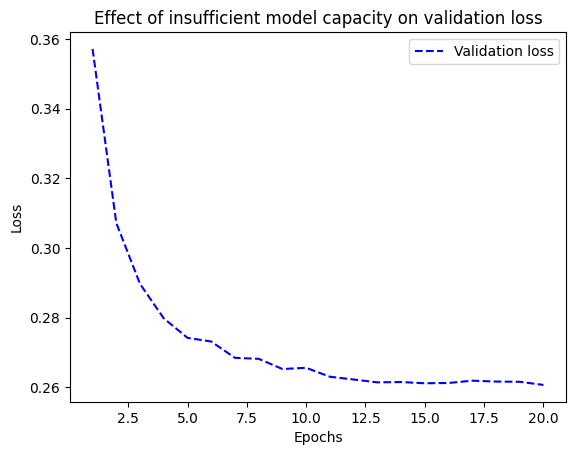

In [11]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

به نظر می‌رسد معیارهای اعتبار سنجی به جای اینکه به اوج خود برسند و مسیرشان را معکوس کنند، متوقف می‌شوند، یا بسیار آهسته بهبود می‌یابند.
- خطای اعتبارسنجی به 0.26 می‌رسد و دیگر بهبود نمی‌یابد.

بیایید یک مدل بزرگتر را آموزش دهیم، یکی با دو لایه میانی با هر کدام 96 واحد:

In [12]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3582 - accuracy: 0.8990 - val_loss: 0.1833 - val_accuracy: 0.9478
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1627 - accuracy: 0.9514 - val_loss: 0.1278 - val_accuracy: 0.9629
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1137 - accuracy: 0.9656 - val_loss: 0.1059 - val_accuracy: 0.9697
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9740 - val_loss: 0.1055 - val_accuracy: 0.9709
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9795 - val_loss: 0.0941 - val_accuracy: 0.9734
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.0942 - val_accuracy: 0.9738
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0959 - val_accuracy: 0.9742
Epoch 

منحنی اعتبار سنجی اکنون دقیقاً همانطور که باید به نظر می‌رسد: مدل به سرعت جا می‌گیرد و پس از 8 دوره شروع به تنظیم بیش‌برازش می‌کند (شکل 5.15 را ببینید).

![Validation loss for a model with appropriate capacity](img/05-15.png)

- بعد از `overfit` وقت آن است که تمرکز خود را روی حداکثر کردن تعمیم قرار دهید.

### تنظیم مجموعه داده
- یادآوری: تعمیم در یادگیری عمیق از ساختار پنهان داده‌ها سرچشمه می‌گیرد.
- نکات مرتبط با مسئله یا داده‌ها در یادگیری عمیق:

    - اگر داده‌های شما امکان درون‌یابی هموار بین نمونه‌ها را فراهم می‌کند، می‌توانید یک مدل یادگیری عمیق را آموزش دهید که تعمیم می‌دهد.

    - اگر مسئله شما نویزی یا از جنس مسائل گسسته است (مثلاً مرتب‌سازی لیست)، یادگیری عمیق به شما کمکی نمی‌کند.

    - یادگیری عمیق برازش منحنی است، نه جادو.

    - صرف تلاش و پول بیشتر برای جمع‌آوری داده‌ها تقریباً همیشه بازده سرمایه‌گذاری بسیار بیشتری را نسبت به هزینه کردن برای توسعه یک مدل بهتر به همراه دارد.

    - مطمئن شوید که داده‌های کافی دارید.
- به یاد داشته باشید که به یک _نمونه گیری متراکم_ از فضای ورودی-متقاطع-خروجی نیاز دارید.
- داده‌های بیشتر مدل بهتری را به همراه خواهد داشت.
- گاهی اوقات، مسايلی که در ابتدا غیرقابل حل به نظر می‌رسند، با مجموعه داده بزرگتر قابل حل می‌شوند.
- خطاهای برچسب زدن را به حداقل برسانید - ورودی‌های خود را برای بررسی ناهنجاری‌ها تجسم کنید و برچسب‌های خود را تصحیح کنید.
- داده‌های خود را پاک کنید و با مقادیر از دست رفته مقابله کنید.
- اگر ویژگی‌های زیادی دارید و مطمئن نیستید که کدام یک واقعا مفید هستند، انتخاب ویژگی را انجام دهید.

یک راه بسیار مهم برای بهبود پتانسیل تعمیم داده‌های شما، مهندسی ویژگی (`feature engineering`) است.

### مهندسی ویژگی

- _مهندسی ویژگی_ فرآیند استفاده از دانش شما در مورد داده‌ها و الگوریتم یادگیری ماشین موجود است

    - داده‌ها باید به گونه‌ای به مدل ارائه شوند که کار مدل را آسان تر کند.

- مثال: فرض کنید در حال تلاش برای ایجاد مدلی هستید که بتواند تصویر یک ساعت را به عنوان ورودی بگیرد و بتواند زمان روز را خروجی دهد (شکل 5.16 را ببینید).

![Feature engineering for reading the time on a clock](img/05-16.png)

اگر می‌خواهید از پیکسل‌های خام تصویر به عنوان داده ورودی استفاده کنید، مشکل یادگیری ماشینی دشواری در دستان خود دارید.
- برای حل آن به یک شبکه عصبی کانولوشنال نیاز دارید و باید مقدار زیادی از منابع محاسباتی را برای آموزش شبکه صرف کنید.

اما اگر قبلاً مشکل را در سطح بالایی درک کرده باشید (می‌دانید چگونه انسان‌ها زمان را بر روی صفحه ساعت می‌خوانند)، می‌توانید ویژگی‌های ورودی بسیار بهتری برای الگوریتم یادگیری ماشین پیدا کنید: به عنوان مثال، نوشتن یک پنج خطی آسان است. اسکریپت پایتون برای دنبال کردن پیکسل‌های سیاه عقربه‌های ساعت و خروجی مختصات (x, y) نوک هر عقربه.
- سپس یک الگوریتم یادگیری ماشینی ساده می‌تواند یاد بگیرد که این مختصات را با زمان مناسب روز مرتبط کند.

حتی می‌توانید جلوتر بروید: یک تغییر مختصات انجام دهید و مختصات (x, y) را به صورت مختصات قطبی با توجه به مرکز تصویر بیان کنید.
- ورودی شما به زاویه تتا هر عقربه ساعت تبدیل می‌شود.
- در این مرحله، ویژگی‌های شما مشکل را چنان آسان می‌کند که نیازی به یادگیری ماشینی نیست. یک عملیات گرد کردن ساده و جستجوی فرهنگ لغت برای بازیابی زمان تقریبی روز کافی است.

این ماهیت مهندسی ویژگی است: آسان کردن یک مشکل با بیان آن به روشی ساده تر.
- منیفولد نهفته را صاف‌تر، ساده‌تر و سازمان‌دهی‌تر کنید.
- انجام این کار معمولا مستلزم درک عمیق مشکل است.

قبل از یادگیری عمیق، مهندسی ویژگی مهم‌ترین بخش گردش کار یادگیری ماشین بود، زیرا الگوریتم‌های کم عمق کلاسیک فضای فرضی کافی برای یادگیری ویژگی‌های مفید را نداشتند.
- نحوه ارائه داده‌ها به الگوریتم برای موفقیت آن کاملاً حیاتی بود.
- به عنوان مثال، قبل از موفقیت شبکه‌های عصبی کانولوشن در مسئله طبقه‌بندی رقمی MNIST، راه‌حل‌ها معمولاً بر اساس ویژگی‌های رمزگذاری‌شده مانند تعداد حلقه‌ها در یک تصویر رقمی، ارتفاع هر رقم در یک تصویر، هیستوگرام مقادیر پیکسل بود. ، و غیره.

- خوشبختانه، یادگیری عمیق مدرن تا حد زیادی نیاز به مهندسی ویژگی‌ها را از بین می‌برد،
- شبکه‌های عصبی قادر به استخراج خودکار ویژگی‌های مفید از داده‌های خام هستند. - اما از آن بی‌نیاز نیستیم:   
    * ویژگی‌های خوب همچنان به شما امکان می‌دهد تا در عین استفاده از منابع کمتر، مشکلات را با ظرافت بیشتری حل کنید.  
        - به عنوان مثال، حل مشکل خواندن صفحه ساعت با استفاده از یک شبکه عصبی کانولوشن مسخره خواهد بود!  
    * ویژگی‌های خوب به شما امکان می‌دهد با داده‌های بسیار کمتر مسئله را حل کنید.  
    * مناسب برای مسائلی که نمونه کم دارید.  

### استفاده از توقف زودهنگام

در یادگیری عمیق، ما همیشه از مدل‌هایی استفاده می‌کنیم که به شدت بیش‌برازش پارامتر هستند: آنها درجات آزادی بیشتری نسبت به حداقل لازم برای تناسب با منیفولد پنهان داده‌ها دارند.
    - همیشه مدت‌ها قبل از رسیدن به حداقل خطای ممکن در داده‌های آموزشی، فرايند یادگیری را قطع می‌کنید (تعمیم).

برای جلوگیری از دوباره کاری و صرف هزینه گران بازآموزی می‌توانید مدل خود را در پایان هر دوره با بهترین نتیجه تا کنون مقایسه کنید. در ادامه یا
- بهترین نتیجه را به روز‌رسانی کنی، یا
- به محض اینکه معیارهای اعتبارسنجی بهبود نیافتند، در حالی که بهترین حالت مدل شناخته شده را به خاطر می‌آورند، آموزش را قطع می‌کند.
- در Keras، انجام این کار با یک فراخوانی `EarlyStopping` معمول است.

### مدل خود را چابک کنید (`regularization`)

تکنیک‌های چابک‌سازی مجموعه‌ای از تکنیک‌ها هستند که به طور فعال مانع از توانایی مدل برای تطبیق کامل با داده‌های آموزشی می‌شوند، با هدف اینکه مدل در طول اعتبارسنجی عملکرد بهتری داشته باشد.
- به این کار «چابک‌سازی» مدل گفته می‌شود، زیرا تمایل دارد مدل را «ساده‌تر» و «منظم‌تر» کند یا منحنی آن را «صاف‌تر» و «عمومی‌تر» کند. 

### تکنیک‌های چابک‌سازی شبکه 
در ادامه روش‌هایی معرفی می‌شوند که برای چابک‌سازی شبکه عصبی می‌توان از آنها استفاده کرد.

#### کاهش اندازه شبکه

قبلاً آموخته‌اید که مدلی که خیلی کوچک باشد نمی‌تواند اطلاعات زیادی را در خود جای دهد.
- ساده ترین راه برای کاهش اضافه برازش، کاهش اندازه مدل است (تعداد پارامترهای قابل یادگیری در مدل، تعیین شده توسط تعداد لایه‌ها و تعداد واحدها در هر لایه).
- در عین حال، به خاطر داشته باشید که باید از مدل‌هایی استفاده کنید که پارامترهای کافی را داشته باشند که کمتر از آن مناسب نباشند: مدل شما نباید *گرسنه* باشد.
- مصالحه‌ای بین _ظرفیت بیش‌برازش_ و _ظرفیت کافی_ وجود دارد.
    - با لایه‌ها و پارامترهای نسبتاً کم شروع کنید و اندازه لایه‌ها را افزایش دهید یا لایه‌های جدید اضافه کنید تا زمانی که بازدهی کاهشی را با توجه به از دست دادن اعتبارسنجی مشاهده کنید.

**مدل اصلی**

In [6]:
from tensorflow.keras.datasets import imdb
import keras
from tensorflow.keras import layers

import numpy as np
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.5352 - accuracy: 0.7854 - val_loss: 0.4045 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3267 - accuracy: 0.8935 - val_loss: 0.3131 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2340 - accuracy: 0.9225 - val_loss: 0.2903 - val_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1835 - accuracy: 0.9393 - val_loss: 0.2756 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1520 - accuracy: 0.9501 - val_loss: 0.2770 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1233 - accuracy: 0.9617 - val_loss: 0.3243 - val_accuracy: 0.8760
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1054 - accuracy: 0.9676 - val_loss: 0.3073 - val_accuracy: 0.8847
Epoch 8/20
30

حالا بیایید سعی کنیم آن را با این مدل کوچکتر جایگزین کنیم.

**نسخه مدل با ظرفیت کمتر**

In [7]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.6335 - accuracy: 0.6718 - val_loss: 0.5572 - val_accuracy: 0.8392
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4979 - accuracy: 0.8705 - val_loss: 0.4605 - val_accuracy: 0.8616
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4028 - accuracy: 0.8945 - val_loss: 0.3909 - val_accuracy: 0.8737
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3323 - accuracy: 0.9073 - val_loss: 0.3435 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2806 - accuracy: 0.9174 - val_loss: 0.3128 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2422 - accuracy: 0.9267 - val_loss: 0.2925 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2128 - accuracy: 0.9342 - val_loss: 0.2803 - val_accuracy: 0.8918
Epoch 8/20
30

![Original model vs. smaller model on IMDB review classification](img/05-17.png)

همانطور که می‌بینید، مدل کوچکتر دیرتر از مدل مرجع شروع به بیش‌برازش می‌کند (بعد از شش دوره به جای چهار)، و عملکرد آن با شروع بیش‌برازش برازش آهسته‌تر کاهش می‌یابد.

اکنون، بیایید مدلی را بررسی خود اضافه کنیم که ظرفیت بسیار بیشتری دارد:
    - اگر شکل خطاها فوراً شروع به بیش‌برازش کند و منحنی از خطای اعتبارسنجی با واریانس بالا متلاطم به نظر برسد، متوجه خواهید شد که مدل شما احتمالا خیلی بزرگ است. 

**نسخه مدل با ظرفیت بالاتر**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

![Original model vs. much larger model on IMDB review classification](img/05-18.png)

مدل بزرگ‌تر تقریباً بلافاصله بعد از یک دوره، بیش‌برازش برازش می‌کند و خیلی شدیدتر می‌شود.
- خطای اعتبارسنجی آن نیز نویزی‌تر است.
- خیلی سریع خطای آموزش آن نزدیک به صفر می‌شود.
    - هر چه مدل ظرفیت بیشتری داشته باشد، سریع‌تر می‌تواند داده‌های آموزشی را مدلسازی کند، اما بیشتر مستعد بیش‌برازش خواهد بود (در نتیجه تفاوت زیادی بین از دست دادن آموزش و اعتبارسنجی ایجاد می‌شود).

  

#### اضافه کردن تنظیم وزن

- قاعده کلی: مدل‌های ساده‌تر نسبت به مدل‌های پیچیده، کمتر برازنده می‌شوند.

یک _simple model_ در این زمینه مدلی است که در آن توزیع مقادیر پارامتر آنتروپی کمتری دارد  یا مدلی با پارامترهای کمتر).
- یک راه متداول برای کاهش بیش‌برازش، اعمال محدودیت‌هایی بر پیچیدگی یک مدل با وادار کردن وزن‌های آن به گرفتن مقادیر کوچک است که توزیع مقادیر وزن‌ها را منظم‌تر می‌کند.
- به این حالت تنظیم وزن ` weight regularization` می‌گویند و با اضافه کردن هزینه‌ای که با داشتن وزنه‌های بزرگ به تابع از دست دادن مدل اضافه می‌شود، انجام می‌شود.
- این هزینه به دو صورت است:
    * تنظیم هزینه اضافه شده متناسب با _مقدار مطلق ضرایب وزنی_ یا همان$L_1$ است .
    * _$L_2$ regularization_ - هزینه اضافه شده متناسب با _square از مقدار ضرایب وزن است (_$L_2$ norm_ از وزن).

    - منظم سازی $L_2$ در زمینه شبکه‌های عصبی _واپاشی وزنی_  `weight decay` نیز نامیده می‌شود.

- در Keras، تنظیم وزن با ارسال _`weight regularizer`_ به لایه‌ها به صورت آرگومان‌های کلمه کلیدی انجام می‌شود.

- مثال: تنظیم وزن $L_2$ را به مدل طبقه‌بندی بررسی فیلم اضافه می‌کنیم.

**افزودن تنظیم وزن $L_2$ به مدل**

In [8]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5766 - accuracy: 0.7873 - val_loss: 0.4717 - val_accuracy: 0.8469
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3846 - accuracy: 0.8947 - val_loss: 0.3769 - val_accuracy: 0.8868
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3199 - accuracy: 0.9171 - val_loss: 0.3633 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2886 - accuracy: 0.9271 - val_loss: 0.3702 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2720 - accuracy: 0.9327 - val_loss: 0.3812 - val_accuracy: 0.8746
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2542 - accuracy: 0.9417 - val_loss: 0.3682 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2449 - accuracy: 0.9448 - val_loss: 0.3642 - val_accuracy: 0.8867
Epoch 8/20
30

مفهوم  0.002 به این معنی است که هر ضریب در ماتریس وزن لایه 0.002 نرم دوم آن وزن خطای کل مدل را اضافه می‌کند.
- توجه داشته باشید که چون این جریمه _فقط در زمان تمرین اضافه می‌شود_ خطای این مدل در آموزش بسیار بیشتر از زمان تست خواهد بود.

شکل زیر تأثیر جریمه تنظیم L2 را نشان می‌دهد.
- همانطور که می‌بینید، مدل با تنظیم L2 نسبت به مدل مرجع بسیار مقاوم‌تر شده است، حتی اگر هر دو مدل تعداد پارامترهای یکسانی دارند.

![Effect of L2 weight regularization on validation loss](img/05-19.png)

به عنوان جایگزینی برای تنظیم وزن L2، می‌توانید از یکی از تنظیم کننده‌های وزن Keras زیر استفاده کنید.

**تنظیم کننده‌های مختلف وزن موجود در کراس**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

توجه داشته باشید که تنظیم وزن بیشتر برای مدل‌های یادگیری عمیق کوچکتر استفاده می‌شود.  
- مدل‌های یادگیری عمیق بزرگ آنقدر پارامتر دارد که اعمال محدودیت‌ بر مقادیر وزن تأثیر زیادی بر ظرفیت و تعمیم مدل ندارد.  
- در این موارد، یک تکنیک چابک‌سازی متفاوت ترجیح داده می‌شود: `dropout`.  
  
#### اضافه کردن  `dropout`   
  
_Dropout_ یکی از موثرترین و پرکاربردترین تکنیک‌های منظم سازی برای شبکه‌های عصبی است.   
    - توسط جف هینتون و دانشجویانش در دانشگاه تورنتو توسعه داده شد.  
    - Dropout، اعمال شده بر روی یک لایه به طور تصادفی تعدادی از خروجی‌های آن را بر اساس نرخ مشخص شده صفر می‌کند.  
    - نرخ `dropout` معمولا بین 0.2 و 0.5 تنظیم می‌شود.  
    - تذکر: در زمان آزمون، هیچ واحدی صفر نمی‌شود.  
         - در زمان آزمون در عمل تغییری در خروجی ایجاد نمی‌شود.   
    - در عوض، مقادیر خروجی لایه با ضریبی برابر با نرخ انصراف کاهش می‌یابد، تا تعادل بیشتری نسبت به زمان آموزش فعال باشد.  
  
وجه داشته باشید که این فرآیند را می‌توان با انجام هر دو عملیات در زمان آموزش و بدون تغییر خروجی در زمان آزمایش، که اغلب به روشی که در عمل اجرا می‌شود، اجرا کرد (شکل 5.20 را ببینید)::  
  
`layer_output *= np.random.randint(0, high=2, size=layer_output.shape) layer_output /= 0.5`  
  
![Dropout applied to an activation matrix at training time, with rescaling happening during training. ](img/05-20.png)  
  
- ایده اصلی این است که وارد کردن نویز در مقادیر خروجی یک لایه می‌تواند الگوهای تصادفی را که مهم نیستند، از بین ببرد.  
  
در Keras، می‌توانید از طریق لایه Dropout که روی خروجی لایه درست قبل از آن اعمال می‌شود، dropout را در یک مدل معرفی کنید.  
- بیایید دو لایه Dropout را در مدل IMDB اضافه کنیم تا ببینیم چقدر در کاهش بیش‌برازش مناسب عمل می‌کنند.  
  
**افزودن  `dropout`  به مدل IMDB**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

![shows a plot of the results. ](img/05-21.png)

- این یک پیشرفت واضح نسبت به مدل مرجع است - همچنین به نظر می‌رسد که بسیار بهتر از تنظیم L2 کار می‌کند، زیرا کمترین خطای اعتبارسنجی بهبود یافته است.

![Effect of dropout on validation loss](img/05-21.png)

- جمع بندی رایج‌ترین راه‌ها برای به حداکثر رساندن تعمیم و جلوگیری از بیش‌برازش در شبکه‌های عصبی:

* داده‌های آموزشی بیشتر یا داده‌های آموزشی بهتر را دریافت کنید.
* ویژگی‌های بهتر را توسعه دهید.
* ظرفیت مدل را کاهش دهید.
* اضافه کردن منظم وزن (برای مدل‌های کوچکتر).
* اضافه کردن  `dropout` .

## خلاصه
* هدف یک مدل یادگیری ماشینی _تعمیم_سازی است: عملکرد دقیق روی ورودی‌هایی که قبلاً دیده نشده اند.
- سخت تر از آن چیزی است که به نظر می‌رسد.
* یک شبکه عصبی عمیق با یادگیری یک مدل پارامتریک به تعمیم دست می‌یابد که می‌تواند با موفقیت بین نمونه‌های آموزشی _ درون یابی_ کند - چنین مدلی می‌توان گفت که "منیفولد نهفته" داده‌های آموزشی را آموخته است.
- به همین دلیل است که مدل‌های یادگیری عمیق فقط می‌توانند ورودی‌هایی را که بسیار نزدیک به آنچه در طول آموزش دیده‌اند معنا کنند.
* مشکل اساسی در یادگیری ماشین، مصالحه بین بهینه‌سازی و تعمیم است: برای دستیابی به تعمیم، ابتدا باید به تطابق خوبی با داده‌های آموزشی دست یابید، اما این بهبود ناگزیر پس از مدتی به تعمیم آسیب می‌رساند.
* توانایی تعمیم مدل‌های یادگیری عمیق از این واقعیت ناشی می‌شود که آنها موفق به یادگیری تقریبی منیفلد پنهان داده‌های خود می‌شوند و بنابراین می‌توانند ورودی‌های جدید را از طریق درون یابی معنا کنند.
* این ضروری است که بتوانید قدرت تعمیم مدل خود را در حالی که در حال توسعه آن هستید به طور دقیق ارزیابی کنید.

    - شما مجموعه‌ای از روش‌های ارزیابی را در اختیار دارید، از اعتبار سنجی ساده نگهدارنده تا اعتبارسنجی متقاطع K-fold و اعتبارسنجی متقاطع K-fold تکرار شده همراه با زدن.

    - به خاطر داشته باشید که همیشه یک مجموعه آزمایشی کاملاً مجزا برای ارزیابی مدل نهایی داشته باشید، زیرا ممکن است اطلاعاتی از داده‌های اعتبارسنجی شما به مدل شما رخ داده باشد.
* هنگامی که کار روی یک مدل را شروع می‌کنید، هدف شما ابتدا دستیابی به مدلی است که دارای قدرت تعمیم است و می‌تواند بیش‌برازش مناسب باشد.

    - بهترین روش‌ها برای انجام این کار عبارتند از تنظیم میزان یادگیری و اندازه دسته‌ای، استفاده از اولویت‌های معماری بهتر، افزایش ظرفیت مدل، یا صرفاً آموزش طولانی‌تر.
* همانطور که مدل شما شروع به تطبیق بیش‌برازش می‌کند، هدف شما به سمت بهبود تعمیم از طریق _`model regulation`_ تغییر می‌کند.

    - می‌توانید ظرفیت مدل خود را کاهش دهید، کاهش وزن یا تنظیم وزن را اضافه کنید و از توقف زودهنگام استفاده کنید.

    -  یک مجموعه داده بزرگتر یا بهتر همیشه راه شماره یک برای کمک به تعمیم یک مدل است.
